In [1]:
import numpy as np 
import pandas as pd
from rpy2 import robjects as ro
from pandas.rpy import common as com
import re
from matplotlib import pyplot as plt

//anaconda/envs/py3.5/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: The pandas.rpy module is deprecated and will be removed in a future version. We refer to external packages like rpy2. 
See here for a guide on how to port your code to rpy2: http://pandas.pydata.org/pandas-docs/stable/r_interface.html


In [2]:
ro.r('''library("ppcor")''');

//anaconda/envs/py3.5/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: MASS

  warnings.warn(x, RRuntimeWarning)


In [3]:
data = pd.read_excel("../../Downloads/airlines.(1).xlsx")

In [4]:
list(enumerate(data.columns))

[(0, 'Авиакомпания'),
 (1, 'Год основания авиакомпании'),
 (2, 'Время существования авиакомпании (лет)'),
 (3, 'Страна         (развитая - 1, развивающаяся - 0)'),
 (4, 'Unnamed: 4'),
 (5, 'Кол-во воздушных судов, шт. '),
 (6, 'Количество направлений (регулярных рейсов)'),
 (7, 'Пассажиро-оборот, млн. пасс-км'),
 (8, 'Кол-во пассажиров, млн. чел. '),
 (9, 'Грузоперевозки, млн.т-км'),
 (10, 'Альянс               (да - 1, нет - 0)'),
 (11, 'Unnamed: 11'),
 (12, 'Лет без катастроф (с 1973 г.)'),
 (13, 'Жертвы авиакатастроф (с 1973 г.)'),
 (14, 'Работники (тыс. чел)'),
 (15, 'Выручка (млрд. долл)'),
 (16, 'Издержки (млрд. долл)')]

In [5]:
col = list(data.columns)
col[10] = 'Альянс'
col[3] = 'Страна'
col[4] = 'Развитая'
data.columns = col

In [6]:
airlines = data.Авиакомпания
data.drop(['Авиакомпания', 'Unnamed: 11'], axis=1, inplace=True)

In [7]:
data = pd.get_dummies(dummy_na = True, data = data,
                      columns=['Страна', 
                               'Альянс'])

In [8]:
data.head()

,Год основания авиакомпании,Время существования авиакомпании (лет),Развитая,"Кол-во воздушных судов, шт.",Количество направлений (регулярных рейсов),"Пассажиро-оборот, млн. пасс-км","Кол-во пассажиров, млн. чел.","Грузоперевозки, млн.т-км",Лет без катастроф (с 1973 г.),Жертвы авиакатастроф (с 1973 г.),...,Страна_ЮАР,Страна_Южная Корея,Страна_Япония,Страна_nan,Альянс_Alliance,Альянс_Oneworld,Альянс_SkyTeam,Альянс_Star Alliance,Альянс_Альянс,Альянс_nan
0,Y,Year,Co,B,Dir,RPK,Pass,FTK,YC,Victim,...,0,0,0,0,1,0,0,0,0,0
1,1928,82,1,729,355,304009,161,3.2,20,236,...,0,0,0,0,0,0,1,0,0,0
2,1933,77,1,367,238,202455,71.4,4.9,3,116,...,0,0,0,0,0,0,1,0,0,0
3,1934,76,1,614,250,196904,85.7,2.4,7,895,...,0,0,0,0,0,1,0,0,0,0
4,1931,79,1,360,230,161663,56.1,2.34,7,257,...,0,0,0,0,0,0,0,1,0,0


In [9]:
data = data.ix[1:52,:]

In [10]:
data.head()

,Год основания авиакомпании,Время существования авиакомпании (лет),Развитая,"Кол-во воздушных судов, шт.",Количество направлений (регулярных рейсов),"Пассажиро-оборот, млн. пасс-км","Кол-во пассажиров, млн. чел.","Грузоперевозки, млн.т-км",Лет без катастроф (с 1973 г.),Жертвы авиакатастроф (с 1973 г.),...,Страна_ЮАР,Страна_Южная Корея,Страна_Япония,Страна_nan,Альянс_Alliance,Альянс_Oneworld,Альянс_SkyTeam,Альянс_Star Alliance,Альянс_Альянс,Альянс_nan
1,1928,82,1,729,355,304009,161,3.2,20,236,...,0,0,0,0,0,0,1,0,0,0
2,1933,77,1,367,238,202455,71.4,4.9,3,116,...,0,0,0,0,0,0,1,0,0,0
3,1934,76,1,614,250,196904,85.7,2.4,7,895,...,0,0,0,0,0,1,0,0,0,0
4,1931,79,1,360,230,161663,56.1,2.34,7,257,...,0,0,0,0,0,0,0,1,0,0
5,1934,76,1,327,287,128437,45.6,1.3,10,25,...,0,0,0,0,0,0,0,1,0,0


In [11]:
cols = list(data.columns)
data.columns = ['a' + str(x) for x in range(len(data.columns))]

In [12]:
list(enumerate(zip(cols,data.columns)))

[(0, ('Год основания авиакомпании', 'a0')),
 (1, ('Время существования авиакомпании (лет)', 'a1')),
 (2, ('Развитая', 'a2')),
 (3, ('Кол-во воздушных судов, шт. ', 'a3')),
 (4, ('Количество направлений (регулярных рейсов)', 'a4')),
 (5, ('Пассажиро-оборот, млн. пасс-км', 'a5')),
 (6, ('Кол-во пассажиров, млн. чел. ', 'a6')),
 (7, ('Грузоперевозки, млн.т-км', 'a7')),
 (8, ('Лет без катастроф (с 1973 г.)', 'a8')),
 (9, ('Жертвы авиакатастроф (с 1973 г.)', 'a9')),
 (10, ('Работники (тыс. чел)', 'a10')),
 (11, ('Выручка (млрд. долл)', 'a11')),
 (12, ('Издержки (млрд. долл)', 'a12')),
 (13, ('Страна_Country', 'a13')),
 (14, ('Страна_Австралия', 'a14')),
 (15, ('Страна_Бразилия', 'a15')),
 (16, ('Страна_Великобритания', 'a16')),
 (17, ('Страна_Германия', 'a17')),
 (18, ('Страна_Ирландия', 'a18')),
 (19, ('Страна_Испания', 'a19')),
 (20, ('Страна_Италия', 'a20')),
 (21, ('Страна_Канада', 'a21')),
 (22, ('Страна_Катар', 'a22')),
 (23, ('Страна_Китай', 'a23')),
 (24, ('Страна_Малайзия', 'a24'))

In [13]:
rdf = com.convert_to_r_dataframe(data.astype('float32'))
ro.globalenv['data'] = rdf

In [14]:
cormat = {}
pearson_cormat_est = {}
for col in data.columns:
    cormat[col] = str(ro.r('cor.test(data$a3, data$' + str(col) + ')'))
    pearson_cormat_est[col] = np.array(ro.r('cor.test(data$a3, data$' + str(col) + ')$estimate'))[0]

for key in np.sort(list(cormat.keys())):
    print('-'*80)
    print(cols[int(key[1:])])
    print(cormat[key])
    print('-'*80)

--------------------------------------------------------------------------------
Год основания авиакомпании

	Pearson's product-moment correlation

data:  data$a3 and data$a0
t = -2.1512, df = 50, p-value = 0.03632
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.52245833 -0.01972283
sample estimates:
       cor 
-0.2910566 


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Время существования авиакомпании (лет)

	Pearson's product-moment correlation

data:  data$a3 and data$a1
t = 2.1512, df = 50, p-value = 0.03632
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.01972283 0.52245833
sample estimates:
      cor 
0.2910566 


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


In [15]:
cormat = {}
for col in data.columns:
    cormat[col] = str(ro.r('cor.test(data$a3, data$' + str(col) + ', method="spearman")'))

for key in np.sort(list(cormat.keys())):
    print('-'*80)
    print(cols[int(key[1:])])
    print(cormat[key])
    print('-'*80)

--------------------------------------------------------------------------------
Год основания авиакомпании

	Spearman's rank correlation rho

data:  data$a3 and data$a0
S = 29296, p-value = 0.07316
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.2505926 


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Время существования авиакомпании (лет)

	Spearman's rank correlation rho

data:  data$a3 and data$a1
S = 17556, p-value = 0.07316
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.2505926 


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Работники (тыс. чел)

	Spearman's rank correlation rho

data:  data$a3 and data$a10
S = 6897.2, p-value = 5.185e-09
alternative hypothesis: true rho is not equ

In [16]:
pcor = np.array((ro.r('pcor(data)$estimate')))

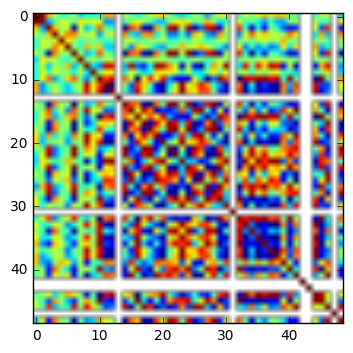

In [17]:
plt.imshow(pcor)
plt.show()

In [18]:
cormat = {}
for i, cor in enumerate(pcor[3]):
    cormat['a'+str(i)] = ('{}\n\nPartial: {}\n'.format(cols[i], cor))
    
for key in np.sort(list(cormat.keys())):
    print('-'*80)
    print(cormat[key])
    print('Pearson: {}'.format(pearson_cormat_est[key]))
    print('-'*80)

--------------------------------------------------------------------------------
Год основания авиакомпании

Partial: 0.14663183592790408

Pearson: -0.2910565791518727
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Время существования авиакомпании (лет)

Partial: -0.1466318359298795

Pearson: 0.2910565791518727
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Работники (тыс. чел)

Partial: -0.43219890804946365

Pearson: 0.7996415203640224
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Выручка (млрд. долл)

Partial: 0.1232320861247087

Pearson: 0.6507322907554649
--------------------------------------------------------------------------------
-------